$\textbf{Problem 2.}$ $\hspace{2mm}$ For the body fat dataset, we wish to examine whether there are outliers. Use $r_i$, 
the  internally  studentized  residual, and $t_i$,  the  externally  studentized  residual,
what conclusion can you draw, respectively?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('bodyfat.txt', delimiter='\s+')

X1 = data[['X1']]
X2 = data[['X2']]
X_points = data[['X1', 'X2']] 
Y = data['Y']

$\textbf{Answer:}$ $\hspace{2mm}$

We calculate hat matrix $H = X (X^T X)^{-1} X^T$ and residual vector of $e_i$'s as we did in Problem 1.  

In [3]:
n = len(Y)
X = np.column_stack((np.ones(n),X_points))  
H = X @ np.linalg.pinv(X.T @ X) @ X.T  
Y_hat = H @ Y
residuals = Y-Y_hat  

$p = 2$ is the number of predictors. We first calculate the sum of squared errors $SSE$.

Then, we calculate the vectors $r$, $t$ of internally and externally  studentized  residuals $r_i$ and $t_i$, respectively.

In [4]:
p = 2

SSE = np.sum(np.multiply(residuals, residuals))  
sigma_squared = SSE/(n-2+1) 
sigma = np.sqrt(sigma_squared)

# Calculate internally and externally  studentized  residual vectors
r = []
t = []
for idx, residual in enumerate(residuals):
  r_i = residual/(sigma*np.sqrt(1-H[idx][idx]))
  r.append(r_i)
  t_i = r_i*np.sqrt((n-p-2)/(n-p-1-(r_i**2)))
  t.append(t_i)

We plot $\hat{Y}$ versus $r$ and $\hat{Y}$ versus $t$ together.

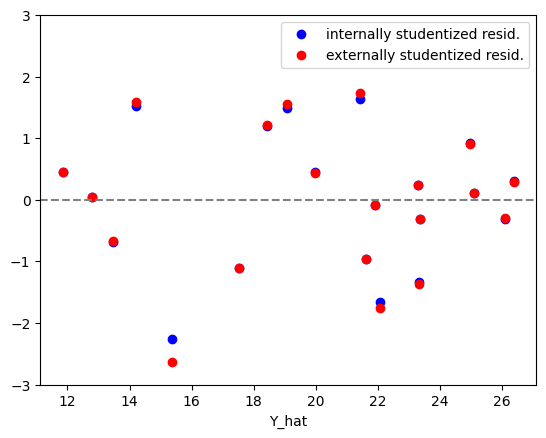

In [11]:
plt.plot(Y_hat, r, 'o', color='blue', label="internally studentized resid.")
plt.plot(Y_hat, t, 'o', color='red', label="externally studentized resid.")
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.ylim([-3, 3])
plt.xlabel("Y_hat")
plt.legend(loc=0)
plt.show() 

We print the observation numbers of the potential outliers. We add 1 to idx in the print line, since indexing of data points starts from 0 in python. 

In [14]:
for idx, (residual, t_value) in enumerate(zip(r, t)):
    if abs(residual) >= 2 or abs(t_value) >= 2:
        print("Observation number:", idx + 1)

Observation number: 13


The index corresponding to that observation is $i=12$. We find predictors of the 13.th observation $X_{13}=(X_1,X_2)$ and its observation value $Y_{13}$.

In [15]:
potential_outlier = (X[12],Y[12])
print(potential_outlier)

(array([ 1. , 18.7, 46.5]), 10.1)


The point $(X_1, X_2, Y_{13})=(18.7, 46.5, 10.1)$ is a potential outlier, which has the largest residual and largest difference in internal and external studentized residual.